**Learning outcomes**

* Construct the state of a multi-qubit system using the tensor product.
* Define and apply separable operations to multiple qubits.

In [1]:
import numpy as np
import pennylane as qml

You may notice that these correspond to the numbers 0-3 in binary; this is not an accident! It is common to write out the integer value, especially for large number of qubits, e.g., ,
$|10> -> |2>$, $|111> -> |7>$.

**Important: qubit-ordering convention**
 In PennyLane, the qubits are indexed numerically from left to right. Therefore, a state such as $|10100>$ indicates that the first and third qubit (or, wires 0 and 2) are in state $|1>$, and the second, fourth, and fifth qubit are in state $|0>$. When drawing quantum circuits, our convention is that the leftmost (first) qubit is at the top of the circuit, such that qubits starting in state  corresponds to the circuit below:
![circuit](./images/I.11.1.png)

**Codercise**
 Write a circuit in PennyLane that accepts an integer value, then prepares and returns the corresponding computational basis state vector $|n>$. (Assume a 3-qubit device). Try a few examples; does the appearance of the state vector match what you expect given the integer
<em>Hint<em>
You will find the numpy function `np.binary_repr` helpful for this challenge.

111
Output state = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
111


(<Figure size 288x288 with 1 Axes>, <Axes:>)

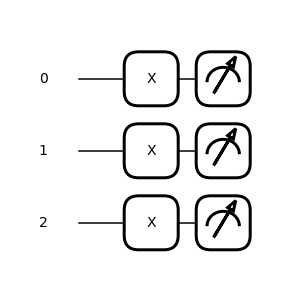

In [22]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The computational basis state |basis_id>.
    """
    qubit_device = 3
    # CREATE THE BASIS STATE

    binary_repr = np.binary_repr(basis_id,qubit_device)
    print(binary_repr)
    for i, v in enumerate(binary_repr):
        if v == '1':
            qml.PauliX(i)

    return qml.state()


basis_id = 7
print(f"Output state = {make_basis_state(basis_id)}")
#qml.draw_mpl(make_basis_state)(basis_id )

**Codercise I.11.2.**
USe PannyLane to cr4eate the state $|+1> = |+>\otimes |1>$. Then, return two measurements:
* the expectation value of Y on the first qubit
* the expectation value of Z on the second qubit

In PennyLane, you can return measurements of multiple observable as a tuple, as long as they don't share wires.

In [26]:
# Creates a device with *two* qubits
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def two_qubit_circuit():

    # PREPARE |+>|1>
    qml.Hadamard(0)
    qml.PauliX(1)
    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return (qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1)))


print(two_qubit_circuit())

[ 0. -1.]


**Codercise I.11.3**
Write Pennylane circuit thet creates the satte $|1-> = |1> \otimes |->$. Then, measure the expectation value of the <em>two-qubit observable $Z \otimes X$<em>. In PennyLane, you can combine observables using the `@` symbol to represent the tensor product, e.g., `qml.PauliZ(0) @ qml.PauliZ(1)`.

In [27]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def create_one_minus():

    # PREPARE |1>|->
    qml.PauliX(0)
    qml.PauliX(1)
    qml.Hadamard(1)
    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X
    expect_value = qml.expval(qml.PauliZ(0)@qml.PauliX(1))

    return expect_value


print(create_one_minus())

0.9999999999999996


**Codercise I.11.4**
Implement the foolowing circuit twice. For one version, measure the observable $Z$ on the first qubit (i.e., $Z \otimes I$), and $Z$ on the second qubit ($I \otimes Z$). For other version, measure the observable $Z \otimes Z$. How do think the results of the first circuit will relate to those of the second? Plot the results as a function of $\theta$  to test your hypothesis.
![circuit](./images/I.11.4.png)

<em>Tip<em> In Pennylane, you don;t need to specify the indetity portion of observables. For example, $I \otimes Z$ is simply `qml.PauliZ(1)` rather than `qml.Identity(0) @ qml.PauliZ(1)`

In [53]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)

    return (qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)

    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))
    combined_results = np.multiply(ZI_results, IZ_results)

    return combined_results



theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)
print('ZI result', ZI_results)
print('IZ result', IZ_results)
print('combined result', combined_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])
print('ZZ_result', ZZ_results)
# Plot your results
#plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)

ZI result [ 1.          0.99798668  0.99195481  0.9819287   0.9679487   0.95007112
  0.92836793  0.90292654  0.87384938  0.84125353  0.80527026  0.76604444
  0.72373404  0.67850941  0.63055267  0.58005691  0.52722547  0.47227107
  0.41541501  0.35688622  0.29692038  0.23575894  0.17364818  0.1108382
  0.04758192 -0.01586596 -0.07924996 -0.14231484 -0.20480667 -0.26647381
 -0.32706796 -0.38634513 -0.44406661 -0.5        -0.55392006 -0.60560969
 -0.65486073 -0.70147489 -0.74526445 -0.78605309 -0.82367658 -0.85798341
 -0.88883545 -0.91610846 -0.93969262 -0.95949297 -0.97542979 -0.98743889
 -0.99547192 -0.99949654 -0.99949654 -0.99547192 -0.98743889 -0.97542979
 -0.95949297 -0.93969262 -0.91610846 -0.88883545 -0.85798341 -0.82367658
 -0.78605309 -0.74526445 -0.70147489 -0.65486073 -0.60560969 -0.55392006
 -0.5        -0.44406661 -0.38634513 -0.32706796 -0.26647381 -0.20480667
 -0.14231484 -0.07924996 -0.01586596  0.04758192  0.1108382   0.17364818
  0.23575894  0.29692038  0.35688622  0.41

![circuit](./images/I.11.4.2.png)